## 输出字体图片

In [2]:
#!/usr/bin/env python
# encoding: utf-8

import time, objc

__all__ = ["Glyphs", "currentDocument", "GSMOVE", "GSLINE", "GSCURVE", "GSOFFCURVE", "GSSHARP", "GSSMOOTH", "GSGlyph", "GSLayer", "GSApplication"]

NSConnection = objc.lookUpClass("NSConnection")

def application(appName):
	port = "com.GeorgSeifert.Glyphs3"
	conn = None
	tries = 0
	
	while ((conn is None) and (tries < 10)):
		conn = NSConnection.connectionWithRegisteredName_host_(port, None)
		tries = tries + 1;
		
		if (not conn):
			time.sleep(1)
	
	if (not conn):
		print("Could not find a JSTalk connection to " + appName)
		return None
	
	return conn.rootProxy()

Glyphs = application("Glyphs");
GSApplication = Glyphs
if Glyphs and Glyphs.orderedDocuments():
	currentDocument = Glyphs.orderedDocuments()[0]
else:
	currentDocument = None

print(currentDocument)
GSMOVE = 17
GSLINE = 1
GSCURVE = 35
GSOFFCURVE = 65
GSSHARP = 0
GSSMOOTH = 4096

def GSGlyph(name=None):
	_Glyph = Glyphs.glyph()
	if name and isinstance(name, str):
		name = NSString.stringWithString_(name)
		_Glyph.setName_(name)
	return _Glyph

def GSLayer():
	return glyphs.layer()
	
def GSPath():
	return glyphs.path()

def GSNode(pt = None, type = None):
	_Node = glyphs.node()
	if pt:
		_Node.setPosition_(pt)
	if type:
		_Node.setType_(type)
	return _Node

def GSAnchor(pt = None, name = None):
	_Anchor = glyphs.anchor()
	if pt:
		_Anchor.setPosition_(pt)
	if name:
		_Anchor.setName_(name)
	return _Anchor

def GSComponent(glyph = None, pt = None, scale = None):
	_Component = glyphs.component()
	if pt:
		_Component.setPosition_(pt)
	if glyph:
		if isinstance(glyph, str):
			_Component.setComponentName_(glyph)
		elif isinstance(name, "GSGlyph"):
			_Component.setComponent_(glyph)
	return _Component

print(Glyphs)
# topmost open document
#document = Glyphs.currentDocument
dir(Glyphs)


<GSDocument: 0x600001387c00>
<GSApplication: 0x12e709440>


['__doc__',
 '__module__',
 '__pyobjc_PythonObject__',
 '__pyobjc_PythonTransient___',
 '__slots__',
 '_allowsDirectEncoding',
 '_conformsToProtocolNamed_',
 '_copyDescription',
 '_isDeallocating',
 '_isDeallocating',
 '_releaseWireCount_',
 '_tryRetain',
 '_tryRetain',
 'allowsWeakReference',
 'appendFormat_',
 'autorelease',
 'classForCoder',
 'class__',
 'class__',
 'conformsToProtocol_',
 'conformsToProtocol_',
 'connectionForProxy',
 'copy',
 'copyWithZone_',
 'dealloc',
 'dealloc',
 'debugDescription',
 'description',
 'description',
 'description',
 'doesNotRecognizeSelector_',
 'encodeWithCoder_',
 'finalize',
 'forwardInvocation_',
 'forwardInvocation_',
 'forwardingTargetForSelector_',
 'hash',
 'hash',
 'initWithCoder_',
 'initWithLocal_connection_',
 'initWithTarget_connection_',
 'isEqual_',
 'isEqual_',
 'isFault',
 'isKindOfClass_',
 'isMemberOfClass_',
 'isNSArray__',
 'isNSCFConstantString__',
 'isNSData__',
 'isNSDate__',
 'isNSDictionary__',
 'isNSNumber__',
 'isNSOb

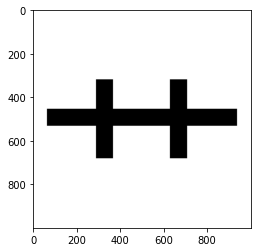

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from fontTools.ttLib import TTFont

from os import listdir
from os.path import isfile, join

sans_path = 'source-han-sans/Regular/'
sans_files = ['SourceHanSansCN-Regular.otf',
              'SourceHanSansTW-Regular.otf',
              'SourceHanSansHK-Regular.otf',
              'SourceHanSansJP-Regular.otf',
              'SourceHanSansKR-Regular.otf']
fontfiles1 = [join(sans_path, f) for f in sans_files]

sans_path2 = 'other-han-sans/'
sans_files2 = ['Alibaba-PuHuiTi-Regular.otf',
               'HarmonyOS_Sans_SC_Regular.ttf',
               'OPPOSans-R.ttf',
               'BabelStoneHan.ttf']
fontfiles2 = [join(sans_path2, f) for f in sans_files2]

fontfiles = fontfiles1 + fontfiles2
# print(fontfiles)

def takeUnicode(elem):
    return elem.encode('unicode_escape').decode()

def has_glyph(glyph, fontpath):
    font = TTFont(fontpath)
    for table in font['cmap'].tables:
        if ord(glyph) in table.cmap.keys():
            return True
    return False

def getImage(text,size,fontpath):
    font = ImageFont.truetype(fontpath,size)
    #font = ImageFont.truetype(fontpath,size, layout_engine=ImageFont.LAYOUT_BASIC)
    #print(dir(font))
    #from pprint import pprint
    #pprint(vars(font))
    # ----------- text 2 image --------------------
    width, height = font.getsize(text)
    offsetx, offsety = font.getoffset(text)
    xmin, ymin, xmax, ymax = font.getmask(text).getbbox()
    #print('w, h, before crop... ', width, height)
    #print('offset before crop ', offsetx, offsety)
    #print('bbox corners ',xmin, ymin, xmax, ymax)
    absxmin, absymin, absxmax, absymax = offsetx + xmin, offsety + ymin, offsetx + xmax, offsety + ymax

    canvas = Image.new("RGB",(width,height),(255,255,255))
    draw = ImageDraw.Draw(canvas)
    draw.text((0,0), text, font=font, fill="#000000")
    # draw.rectangle([absxmin, absymin, absxmax, absymax],outline='red',width=5)

    # ------------ crop img --------------
    canvas = canvas.crop((absxmin, absymin, absxmax, absymax))
    width, height = canvas.size
    #print('bbox w, h after crop ', width, height)

    if width>size or height>size:
        scale = max(width, height)/float(size)
        new_w, new_h = int(width/scale), int(height/scale)
        canvas = canvas.resize((new_w, new_h))
        width, height = canvas.size
        print('bbox w, h after resize ', width, height)

    # ------------ pad img ---------------
    pad_left = (size - width)//2
    pad_top = (size - height)//2
    canvas2 = Image.new("RGB",(size,size),(255,255,255))
    canvas2.paste(canvas,(pad_left, pad_top))
    # box = getbox(im)
    # print(box)
    return canvas2

def getbox(img):
    box = None
    arr = np.asarray(img)
    if len(arr.shape) == 3:
        arr = arr[:,:,0]
    arr_arg = np.argwhere(arr<255)
    if len(arr_arg) == 0:
        # print('empty image, text not exist')
        box = None
    else:
        max_yx = np.max(arr_arg,0)
        min_yx = np.min(arr_arg,0)
    #     print(min_yx, max_yx)
        x0,y0,x1,y1 = min_yx[1], min_yx[0], max_yx[1], max_yx[0]
        box = [x0,y0,x1,y1]
    return box

def addbox(img, box):
    dr=ImageDraw.Draw(img)
    dr.rectangle(box, outline='blue', width=5)
    return img

# 单独一个字保存到目录下
# getFontImage_test('罙',size).save('./data/1225/source_{}.png'.format(takeUnicode('罙')[2:]))
# 㚑彐大, 䔝艹紫
text = '艹'
size = 1000
fontpath=fontfiles[0]
# check if text exists in font
check = has_glyph(text, fontpath)
img = getImage(text, size, fontpath)
img.save('./data/{}.png'.format(takeUnicode(text)[1:]))
# 𪠇
# 罙
# 亻

# 单独预览一个字
plt.imshow(img)
# plt.imshow(getFontImage_test("𪠇",size,fontpaths=None,complement_fontpaths=None)) #\U000F0003 \ue050 fontpaths=fontfiles
plt.axis('on') # 关掉坐标轴为 off
plt.show()


w, h, before crop...  1000 1160
offset before crop  0 370
bbox corners  63 0 935 363
bbox w, h after crop  872 363


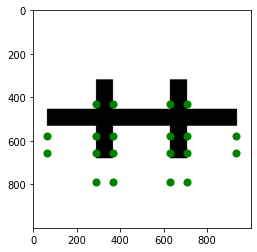

In [10]:
text = '艹'
size = 1000
fontpath=fontfiles[0]
# check if text exists in font
check = has_glyph(text, fontpath)
#---------------------------------------------------------------
font = ImageFont.truetype(fontpath,size)
# ----------- text 2 image --------------------
width, height = font.getsize(text)
offsetx, offsety = font.getoffset(text)
xmin, ymin, xmax, ymax = font.getmask(text).getbbox()
print('w, h, before crop... ', width, height)
print('offset before crop ', offsetx, offsety)
print('bbox corners ',xmin, ymin, xmax, ymax)
absxmin, absymin, absxmax, absymax = offsetx + xmin, offsety + ymin, offsetx + xmax, offsety + ymax

canvas = Image.new("RGB",(width,height),(255,255,255))
draw = ImageDraw.Draw(canvas)
draw.text((0,0), text, font=font, fill="#000000")
# draw.rectangle([absxmin, absymin, absxmax, absymax],outline='red',width=5)
# ------------ crop img --------------
canvas = canvas.crop((absxmin, absymin, absxmax, absymax))
width, height = canvas.size
print('bbox w, h after crop ', width, height)
# ------------ pad img ---------------
pad_left = (size - width)//2
pad_top = (size - height)//2
canvas2 = Image.new("RGB",(size,size),(255,255,255))
canvas2.paste(canvas,(pad_left, pad_top))
img = canvas2
#---------------------------------------------------------------
nodelist = [288,790,
288,655,
63,655 ,
63,577 ,
288,577 ,
288,428 ,
366,428 ,
366,577 ,
627,577 ,
627,428 ,
706,428 ,
706,577 ,
935,577 ,
935,655 ,
706,655 ,
706,790 ,
627,790 ,
627,655 ,
366,655 ,
366,790]

size = int(len(nodelist)/2),2
node_array = np.array(nodelist)
node_array = node_array.reshape(size)
x,y=node_array[:,0],node_array[:,1]
plt.scatter(x, y, c="g", s=50, marker=r'o')

plt.imshow(img)
plt.axis('on') # 关掉坐标轴为 off
plt.show()


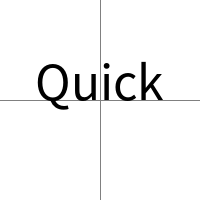

In [21]:
from PIL import Image, ImageDraw, ImageFont
font = ImageFont.truetype(fontpath, 48)
im = Image.new("RGB", (200, 200), "white")
d = ImageDraw.Draw(im)
d.line(((0, 100), (200, 100)), "gray")
d.line(((100, 0), (100, 200)), "gray")
d.text((100, 100), "Quick", fill="black", anchor="ms", font=font)
im

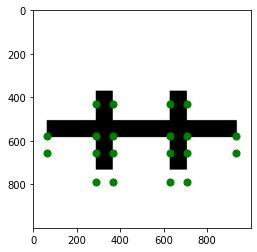

In [47]:
from PIL import Image, ImageDraw, ImageFont
font = ImageFont.truetype(fontpath, 1000)
im = Image.new("RGB", (1000, 1000), "white")
d = ImageDraw.Draw(im)
#d.line(((0, 100), (200, 100)), "gray")
#d.line(((100, 0), (100, 200)), "gray")
#d.text((100, 100), '艹', fill="black", anchor="ls", font=font)
d.text((0, 0), '艹', fill="black", anchor="la",font=font)
im
nodelist = [288,790,
288,655,
63,655 ,
63,577 ,
288,577 ,
288,428 ,
366,428 ,
366,577 ,
627,577 ,
627,428 ,
706,428 ,
706,577 ,
935,577 ,
935,655 ,
706,655 ,
706,790 ,
627,790 ,
627,655 ,
366,655 ,
366,790]

size = int(len(nodelist)/2),2
node_array = np.array(nodelist)
node_array = node_array.reshape(size)
x,y=node_array[:,0],node_array[:,1]
plt.scatter(x, y, c="g", s=50, marker=r'o')

plt.imshow(im)
plt.axis('on') # 关掉坐标轴为 off
plt.show()

# 输出多列图片

source-han-sans/Regular/SourceHanSansCN-Regular.otf [True, True, True]


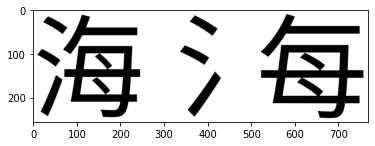

source-han-sans/Regular/SourceHanSansCN-Regular.otf [True, True, False]
source-han-sans/Regular/SourceHanSansTW-Regular.otf [False, True, False]
source-han-sans/Regular/SourceHanSansHK-Regular.otf [False, True, False]
source-han-sans/Regular/SourceHanSansJP-Regular.otf [False, True, False]
source-han-sans/Regular/SourceHanSansKR-Regular.otf [False, True, False]
other-han-sans/Alibaba-PuHuiTi-Regular.otf [True, True, False]
other-han-sans/HarmonyOS_Sans_SC_Regular.ttf [True, True, False]
other-han-sans/OPPOSans-R.ttf [True, True, False]
other-han-sans/BabelStoneHan.ttf [False, True, True]


In [154]:
import numpy as np
import matplotlib.pyplot as plt
from functools import cmp_to_key
from fontTools.ttLib import TTFont

import os
from PIL import Image, ImageFont, ImageDraw
import re
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image, ImageFont, ImageDraw
import warnings

# 图片大小，像素
size = 256 

# 单独一个字保存到目录下
text = '罙'
fontpath = fontfiles[0]
check = has_glyph(text, fontpath)
img = getImage(text, size, fontpath)
im.save('./data/1222/{}.png'.format(takeUnicode(text)[1:]))

def checkTexts(texts,fontpath):
    checklist = []
    for text in texts:
        exist = has_glyph(text, fontpath)
        checklist.append(exist)
    return checklist

def mergeImages(texts,size,fontpath):
    l = len(texts)
    canvas = Image.new("RGB",(size*l,size),(255,255,255))
    for i in range(l):
        # 图片距离左边的大小, 距离上边的大小
        a, b = size*i, 0
        m = getImage(texts[i], size, fontpath)
        canvas.paste(m, (a, b))
    return canvas

#'[_f979_, _凉_, _冫_, _京_]', '[_f9f1_, _隣_, _阝_, _粦_]'
# 海', '氵', '每' [_u3b04_, _㬄_, _日_, _𪠇_].png
texts = ['海','氵','每']
for fontpath in fontfiles:
    checklist = checkTexts(texts, fontpath)
    print(fontpath, checklist)
    if all(checklist):
        im = mergeImages(texts, size, fontpath) 
        content='[海氵每]'
        im.save('data/1222/{}.png'.format(str(content)))
        plt.imshow(im)
        plt.axis('on') # 关掉坐标轴为 off
        plt.show()
        break

texts = ['㬄', '日', '𪠇']
for fontpath in fontfiles:
    checklist = checkTexts(texts, fontpath)
    print(fontpath, checklist)
    if all(checklist):
        im = mergeImages(texts, size, fontpath) 
        content='[㬄, 日, 𪠇]'
        im.save('data/1222/{}.png'.format(str(content)))
        plt.imshow(im)
        plt.axis('on') # 关掉坐标轴为 off
        plt.show()
        break


In [155]:
import sys
fsencoding = sys.getfilesystemencoding()
print(fsencoding)

from platform import python_version
print(python_version())

utf-8
3.8.2


In [158]:
# Reading an excel file using Python 

# import xlrd
# Give the location of the file 
# loc = ("wetransfer-1f9295/Hanzi-LR.xlsx")
# To open Workbook 
# wb = xlrd.open_workbook(loc)
# sheet = wb.sheet_by_index(0)

from openpyxl import load_workbook
workbook = load_workbook(filename="zi-unicode/Hanzi-Database-1222.xlsx",read_only=True)
print(workbook.sheetnames)

# from pandas import read_excel
# my_sheet = 'Sheet1' # change it to your sheet name, you can find your sheet name at the bottom left of your excel file
# file_name = 'zi-unicode/Hanzi-Database-0603.xlsx' # change it to the name of your excel file
# df = read_excel(file_name, sheet_name = my_sheet)
# print(df.head()) # shows headers with top 5 rows



['Sheet1']


In [159]:
sheet = workbook.active
print(sheet.title)
print(sheet["A1"].value)

for value in sheet.iter_rows(min_row=1,max_row=5,min_col=1,max_col=10,values_only=True):
    print(value)

Sheet1
HanziID
('HanziID', 'Hanzi', 'Standard', 'Unicode', 'Radical', 'LayoutID', 'Box0', 'Box1', 'Box2', 'Nested')
(0, '㐀', 'CJK扩展A', '3400', None, 'NL00', '㐀', None, None, None)
(1, '㐁', 'CJK扩展A', '3401', None, 'NL03', 'NL02', '人', None, 1)
(2, '㐂', 'CJK扩展A', '3402', None, 'NL02', '七', 'NL01', None, 1)
(3, '㐃', 'CJK扩展A', '3403', None, 'NL00', '㐃', None, None, None)


# Generate Images

In [165]:
import warnings
# for i in range(sheet.ncols): 
#     print(sheet.cell_value(0, i))
# mypath = 'AIZI-fonts collection/宋体/'
# fontfiles = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f)) and f[0]!='.' and f[-3:]!='ttc']

for value in sheet.iter_rows(min_row=1,max_row=1,values_only=True):
    print(value)
    titles = value
    ind_zi = titles.index('Hanzi')
    ind_box0 = titles.index('Box0')
    ind_box1 = titles.index('Box1')
    ind_unicode = titles.index('Unicode')
    ind_zi_id = titles.index('HanziID')
    ind_layout = titles.index('LayoutID')
    print(ind_zi,ind_box0,ind_box1,ind_unicode,ind_zi_id, ind_layout)
    # title = ['HanziID', 'Hanzi', 'Standard', 'Unicode', 'Radical', 'LayoutID', 'Box0', 'Box1', 'Box2', 'Nested']

counter = 0
print(sheet.max_row)

parent_dir = 'data/1222/20211225'
if not os.path.exists(parent_dir):
    os.makedirs(parent_dir)
img_dir = os.path.join(parent_dir, 'LID01')
print(img_dir)
if not os.path.exists(img_dir):
    os.makedirs(img_dir)

check_zi_missing = False
check_zi_unicode = False
generate_zi_image = True    

if generate_zi_image is True:
    file1 = os.path.join(parent_dir, 'LID01_副本.txt')
    file2 = os.path.join(parent_dir, 'LID01_无法显示.txt')
    f1 = open(file1,"w+")
    f2 = open(file2,"w+")

if check_zi_missing is True:
    file_unicode_wrong = os.path.join(parent_dir, 'Unicode_wrong.txt')
    funicode_wrong = open(file_unicode_wrong,"w+")
    funicode_wrong.write('zi_id' + "\n")

if check_zi_unicode is True:
    file_unicode_missmatch = os.path.join(parent_dir, 'Unicode_missmatch.txt')
    funicode_missmatch = open(file_unicode_missmatch,"w+")
    funicode_missmatch.write('missing zi_id' + "\n")

check_list = [None, 'NL01', 'NL02', 'NL03', 'NL04', 'NL05', 'NL06', 'NL07', 'NL08']
zi_id_front = None
# min_row=2,max_row=sheet.max_row (1700, 1900)
for value in sheet.iter_rows(min_row=2,max_row=sheet.max_row,values_only=True):
    zi_id = value[ind_zi_id]
    counter += 1
    #pause_counter = 200
    #if counter >=pause_counter:
    #    print('stopped now!')
    #    break
    #------------------------------------------------------------------------------------------
    #--------------- check if zi is missing in the database -----------------------------------
    if check_zi_missing is True:
        if zi_id_front is None:
            zi_diff = 1
            zi_id_front = zi_id
        elif not isinstance(zi_id, int):
            print('zi_id type is not int \n')
            funicode_missmatch.write(f'zi_id type is wrong {format(zi_id.__class__.__name__)} after zi_id {format(zi_id_front)}' + "\n")
        else:
            zi_diff = zi_id - zi_id_front
            zi_id_front = zi_id

        if zi_diff > 1:
            funicode_missmatch.write(f'{format(zi_diff-1)} zi is/are missing before zi_id {format(zi_id)}' + "\n")

    #------------------------------------------------------------------------------------------
    #--------------- check if the unicode Type is correct in the database --------------------------
    if check_zi_unicode is True:
        code_ = value[ind_unicode]
        zi = value[ind_zi]
        print('unicode is ', code_)
        print('zi is ', zi)
        if zi is not None:
            print('decoded unicode is ', str(takeUnicode(zi)))
        code = code_.strip() if isinstance(code_, str) else code_
        if not isinstance(code_, str):
            print(counter, zi_id, sheet.max_row, code_, type(code_))
            print('The unicode is not a string !!!')
            if isinstance(code_, int) or isinstance(code_, float) or code_ is None:
                warnings.warn(f'the unicode type is {format(code_.__class__.__name__)}', category=None, stacklevel=1, source=None)
            else:
                warnings.warn(f'the unicode type is not defined.', category=None, stacklevel=1, source=None)        
            funicode_wrong.write(str(zi_id) + '\t' + code_.__class__.__name__ + "\n")
            if zi_id is None:
                funicode_wrong.write('Previous zi_id is None, counter shows it is in row ' + str(counter) + "\n")

    #------------------------------------------------------------------------------------------
    #--------------- get zi with components-1&2  ----------------------------------------------
    if generate_zi_image is True:
        cs_ = [value[j] for j in [ind_unicode, ind_zi, ind_box0, ind_box1]]
        cs = [x if not isinstance(x, str) else x.strip() for x in cs_]

        if value[ind_layout] == 'NL01':
            if not any(t in cs for t in check_list):
                texts = [cs[i] for i in range(1,len(cs))]
                textlength = [len(text) for text in texts]
                cslength = np.asarray(textlength).sum()
                zi_unicode = takeUnicode(cs[1]).replace('\\', '')
                print(f'Unicode of {format(cs[1])} is ',zi_unicode)
                cs[0] = zi_unicode
                print(counter, cs)
                content = '[_'+ '_, _'.join(cs) + '_]'
                #-------------------------- generate images --------------------------
                flag = False
                exist_in_fontfile = False
                if cslength == 3:
                    flag = True
                    fontpath_ind = 0
                    for fontpath in fontfiles:
                        fontpath_ind += 1
                        checklist = checkTexts(texts, fontpath)
                        print(fontpath, checklist)
                        if all(checklist):
                            exist_in_fontfile = True
                            # im = mergeImages(texts, size, fontpath)
                            break
                else:
                    flag = False
                    warnings.warn(f'This item contains more than 3 zi as expected {format(cs)}')
                #----------------------------
                print('{} exist: {}'.format(cs, exist_in_fontfile))
                if flag is False or exist_in_fontfile is False:
                    f2.write("\t".join(cs)+"\n")
                    # f2.write(content+"\n")
                elif flag and exist_in_fontfile:
                    # im.save( os.path.join(img_dir ,'{}.png'.format(str(content))))
                    cs.append(str(fontpath_ind))
                    f1.write( "\t".join(cs)+"\n")

if generate_zi_image is True:
    f1.close()
    f2.close()
if check_zi_unicode is True:
    funicode_wrong.close()
if check_zi_unicode is True:
    funicode_missmatch.close()
    
### left-right, fontfiles 3,6,7,8 is always empty.
# 1 source-han-sans/Regular/SourceHanSansCN-Regular.otf
# 2 source-han-sans/Regular/SourceHanSansTW-Regular.otf
# 3 source-han-sans/Regular/SourceHanSansHK-Regular.otf
# 4 source-han-sans/Regular/SourceHanSansJP-Regular.otf
# 5 source-han-sans/Regular/SourceHanSansKR-Regular.otf
# 6 other-han-sans/Alibaba-PuHuiTi-Regular.otf
# 7 other-han-sans/HarmonyOS_Sans_SC_Regular.ttf
# 8 other-han-sans/OPPOSans-R.ttf
# 9 other-han-sans/BabelStoneHan.ttf

Sheet1
HanziID
('HanziID', 'Hanzi', 'Standard', 'Unicode', 'Radical', 'LayoutID', 'Box0', 'Box1', 'Box2', 'Nested')
(0, '㐀', 'CJK扩展A', '3400', None, 'NL00', '㐀', None, None, None)
(1, '㐁', 'CJK扩展A', '3401', None, 'NL03', 'NL02', '人', None, 1)
(2, '㐂', 'CJK扩展A', '3402', None, 'NL02', '七', 'NL01', None, 1)
(3, '㐃', 'CJK扩展A', '3403', None, 'NL00', '㐃', None, None, None)


# Update images with updated xlsx file
## 1. check the differences

In [14]:
import xlrd
import numpy as np
import os
from os import listdir
from os.path import isfile, join

# read the updated xlsx file
loc = ("wetransfer-1f9295/Hanzi-LRv2.xlsx")
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(0)

titles = sheet.row_values(0)
print(titles)
ind_zi = titles.index('Hanzi')
ind_box0 = titles.index('box0')
ind_box1 = titles.index('box1')
ind_unicode = titles.index('Unicode')

# get list from sheet
sheet_namelist = []
sheet_zilist = []

counter = 0
for i in range(1, sheet.nrows):
    counter += 1
    code = sheet.row_values(i)[ind_unicode].strip()
    cs = [sheet.row_values(i)[j].strip() for j in [ind_unicode, ind_zi, ind_box0, ind_box1]]
    texts = [cs[i] for i in range(1,len(cs))]
    textlength = [len(text) for text in texts]
    cslength = np.asarray(textlength).sum()
    if cslength == 3:
        content = '_, _'.join(cs)
        content = '[_'+content+'_]'
        sheet_namelist.append(content)
        sheet_zilist.append(cs)
    else:
        print('This item contains more texts than expected {} {}'.format(i, cs))

# read image names from imgdir
imgpath = "gb2312/20200627/LID01"  #31331
pngfiles = [os.path.splitext(f)[0] for f in listdir(imgpath) if isfile(join(imgpath, f)) and f[0]!='.']

def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3

def outlier(lst1, lst2): 
    lst3 = [value for value in lst1 if value not in lst2] 
    return lst3

# overlap = intersection(sheet_namelist, pngfiles)
missing_imgs = outlier(sheet_namelist, pngfiles)
noise_imgs = outlier(pngfiles, sheet_namelist)

# find the item index in the missing file
st = set(missing_imgs)
ind_list = [i for i, e in enumerate(sheet_namelist) if e in st]

# add missing images
img_dir = "gb2312/20200627/LID01"
for i in range(len(ind_list)):
    ind = ind_list[i]
    cs = sheet_zilist[ind]
    print('adding missing image {}/{}'.format(i,len(ind_list)), cs)
    im, flag = mergeImages(cs[1::],size,LID='LID01')

    if flag is False:
        print('{} exist: {}'.format(cs, flag))
    else:
        content = '_, _'.join(cs)
        content = '[_'+content+'_]'
        im.save(os.path.join(img_dir, '{}.png'.format(str(content))))

# find the item index in the noise file
st = set(noise_imgs)
ind_list_noise = [i for i, e in enumerate(pngfiles) if e in st]

# remove missing images
for i in range(len(ind_list_noise)):
    ind = ind_list_noise[i]
    imgname = pngfiles[ind]+'.png'
    img = os.path.join(imgpath,imgname)
    print('deleting missing image {}/{}'.format(i,len(ind_list_noise)), img)
    os.remove(img)



['Hanzi', 'Unicode', 'box0', 'box1']
This item contains more texts than expected 31536 ['0002816b', '𨅫', '足', '麦去']
This item contains more texts than expected 41861 ['0002cf34', '𬼴', '乡', '共亍']
This item contains more texts than expected 41912 ['0002cfaa', '𬾪', '亻', '云另']
This item contains more texts than expected 41913 ['0002cfab', '𬾫', '亻', '玄亇']
This item contains more texts than expected 41932 ['0002cfca', '𬿊', '亻', '兒也']
This item contains more texts than expected 41953 ['0002cfee', '𬿮', '亻', '育攵']
This item contains more texts than expected 42104 ['0002d11d', '𭄝', '刀', '雚欠']
This item contains more texts than expected 42105 ['0002d124', '𭄤', '彳', '力亍']
This item contains more texts than expected 42482 ['0002d488', '𭒈', '女', '目少']
This item contains more texts than expected 43382 ['0002dc1d', '𭰝', '氵', '丿臣']
adding missing image 0/370 ['437e', '䍾', '开', '羽']
adding missing image 1/370 ['4380', '䎀', '戉', '羽']
adding missing image 2/370 ['4381', '䎁', '古', '羽']
adding missing image

/Users/wei/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: Could not find Unicode in fontfiles


['f90b', '喇', '口', '剌'] exist: False
adding missing image 58/370 ['f911', '螺', '虫', '累']
['f911', '螺', '虫', '累'] exist: False
adding missing image 59/370 ['f912', '裸', '衤', '果']
['f912', '裸', '衤', '果'] exist: False
adding missing image 60/370 ['f915', '洛', '氵', '各']
['f915', '洛', '氵', '各'] exist: False
adding missing image 61/370 ['f916', '烙', '火', '各']
['f916', '烙', '火', '各'] exist: False
adding missing image 62/370 ['f917', '珞', '王', '各']
['f917', '珞', '王', '各'] exist: False
adding missing image 63/370 ['f919', '酪', '酉', '各']
['f919', '酪', '酉', '各'] exist: False
adding missing image 64/370 ['f91a', '駱', '馬', '各']
['f91a', '駱', '馬', '各'] exist: False
adding missing image 65/370 ['f91d', '欄', '木', '闌']
['f91d', '欄', '木', '闌'] exist: False
adding missing image 66/370 ['f91e', '爛', '火', '闌']
['f91e', '爛', '火', '闌'] exist: False
adding missing image 67/370 ['f924', '襤', '衤', '監']
['f924', '襤', '衤', '監'] exist: False
adding missing image 68/370 ['f925', '拉', '扌', '立']
['f925', '拉', '扌', '立

['f9dd', '利', '禾', '刂'] exist: False
adding missing image 150/370 ['f9e3', '泥', '氵', '尼']
['f9e3', '泥', '氵', '尼'] exist: False
adding missing image 151/370 ['f9e4', '理', '王', '里']
['f9e4', '理', '王', '里'] exist: False
adding missing image 152/370 ['f9e8', '裡', '衤', '里']
['f9e8', '裡', '衤', '里'] exist: False
adding missing image 153/370 ['f9ea', '離', '离', '隹']
['f9ea', '離', '离', '隹'] exist: False
adding missing image 154/370 ['f9ee', '燐', '火', '粦']
['f9ee', '燐', '火', '粦'] exist: False
adding missing image 155/370 ['f9ef', '璘', '王', '粦']
['f9ef', '璘', '王', '粦'] exist: False
adding missing image 156/370 ['f9f2', '鱗', '魚', '粦']
['f9f2', '鱗', '魚', '粦'] exist: False
adding missing image 157/370 ['f9f3', '麟', '鹿', '粦']
['f9f3', '麟', '鹿', '粦'] exist: False
adding missing image 158/370 ['f9f4', '林', '木', '木']
['f9f4', '林', '木', '木'] exist: False
adding missing image 159/370 ['f9f5', '淋', '氵', '林']
['f9f5', '淋', '氵', '林'] exist: False
adding missing image 160/370 ['f9f9', '粒', '米', '立']
['f9f9', '

['0002e061', '\ue061', '纟', '川'] exist: False
adding missing image 237/370 ['0002e063', '\ue063', '犭', '贪']
['0002e063', '\ue063', '犭', '贪'] exist: False
adding missing image 238/370 ['0002e065', '\ue065', '钅', '斤']
['0002e065', '\ue065', '钅', '斤'] exist: False
adding missing image 239/370 ['0002e066', '\ue066', '亻', '厓']
['0002e066', '\ue066', '亻', '厓'] exist: False
adding missing image 240/370 ['0002e068', '\ue068', '弓', '区']
['0002e068', '\ue068', '弓', '区'] exist: False
adding missing image 241/370 ['0002e069', '\ue069', '弗', '阝']
['0002e069', '\ue069', '弗', '阝'] exist: False
adding missing image 242/370 ['0002e06a', '\ue06a', '犭', '冬']
['0002e06a', '\ue06a', '犭', '冬'] exist: False
adding missing image 243/370 ['0002e06b', '\ue06b', '牙', '合']
['0002e06b', '\ue06b', '牙', '合'] exist: False
adding missing image 244/370 ['0002e06c', '\ue06c', '火', '无']
['0002e06c', '\ue06c', '火', '无'] exist: False
adding missing image 245/370 ['0002e06d', '\ue06d', '亻', '毛']
['0002e06d', '\ue06d', '亻', 

['0002e0bb', '\ue0bb', '马', '冉'] exist: False
adding missing image 313/370 ['0002e0bc', '\ue0bc', '马', '冋']
['0002e0bc', '\ue0bc', '马', '冋'] exist: False
adding missing image 314/370 ['0002e0bd', '\ue0bd', '纟', '冋']
['0002e0bd', '\ue0bd', '纟', '冋'] exist: False
adding missing image 315/370 ['0002e0bf', '\ue0bf', '王', '犮']
['0002e0bf', '\ue0bf', '王', '犮'] exist: False
adding missing image 316/370 ['0002e0c0', '\ue0c0', '王', '卢']
['0002e0c0', '\ue0c0', '王', '卢'] exist: False
adding missing image 317/370 ['0002e0c1', '\ue0c1', '王', '弁']
['0002e0c1', '\ue0c1', '王', '弁'] exist: False
adding missing image 318/370 ['0002e0c2', '\ue0c2', '扌', '先']
['0002e0c2', '\ue0c2', '扌', '先'] exist: False
adding missing image 319/370 ['0002e0c3', '\ue0c3', '土', '夅']
['0002e0c3', '\ue0c3', '土', '夅'] exist: False
adding missing image 320/370 ['0002e0c6', '\ue0c6', '木', '去']
['0002e0c6', '\ue0c6', '木', '去'] exist: False
adding missing image 321/370 ['0002e0c7', '\ue0c7', '辰', '阝']
['0002e0c7', '\ue0c7', '辰', 

# Rename images & txt files by adding unicode

In [23]:
from os.path import isfile, join
rename = False
if rename is True:
    imgpath = "gb2312/20200629/LID01"  #31331
    pngfiles = [os.path.splitext(f)[0] for f in listdir(imgpath) if isfile(join(imgpath, f)) and f[0]!='.']

    for name in pngfiles:
        img_name = name + '.png'
        zi = name[2]
        code = takeUnicode(zi)
        code = str(code)[2::]
        new_name = '[_' + code + '_, ' + img_name.strip('[')
        print(img_name, new_name)
    #     break
        os.rename(imgpath + "/" + img_name, imgpath + "/" + new_name)

    new_filename = open("gb2312/20200629/LID01_副本2.txt","w+")
    filename = "gb2312/20200629/LID01_副本.txt"
    with open(filename) as f:
        content = f.readlines()

    for x in content:
        item = x.strip().split('\t') # remove whitespace characters like `\n` at the end of each line
        zi = item[0]
        code = takeUnicode(zi)
        code_str = str(code)[2:]
        new_item = [code_str] + item
        print(new_item)
        new_filename.write( "\t".join(new_item)+"\n")

    new_filename.close()

# Check replicates in the txt file

In [257]:
filename = "gb2312/20200627/LID01_副本.txt"
with open(filename) as f:
    content = f.readlines()
# remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 
print(len(content), len(set(content)))

import collections
replicate = [item for item, count in collections.Counter(content).items() if count > 1]
print(len(replicate),replicate)

31333 31333
0 []


# Check mismatches between images and txt file

In [8]:
filename = "gb2312/20200627/LID01_副本.txt"
with open(filename) as f:
    content = f.readlines()

cs = [x.strip() for x in content] #31333
content = ['[_'+'_, _'.join(x.split())+'_]' for x in cs]

from os import listdir
from os.path import isfile, join
imgpath = "gb2312/20200627/LID01"  #31331
pngfiles = [os.path.splitext(f)[0] for f in listdir(imgpath) if isfile(join(imgpath, f)) and f[0]!='.']

def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3

def outlier(lst1, lst2): 
    lst3 = [value for value in lst1 if value not in lst2] 
    return lst3

overlap = intersection(content, pngfiles)
missimg = outlier(content, pngfiles)

print('txt img No', len(content))
print('directory img No', len(pngfiles))
print('overlap img No', len(overlap))
print('missing img in the directory:', missimg)


txt img No 43545
directory img No 43545
overlap img No 43545
missing img in the directory: []


# 左右结构居中

In [4]:
counter = 0
with open('gb2312/20200624/LID01_副本.txt', 'r') as f:
    for line in f:
        cs = [c.replace('\n','') for c in line.split('	')]
        print(cs)
        content = '_, _'.join(cs)
        content = '[_'+content+'_]'
        counter += 1
        # if counter % 300 == 1:
        mergeImages(cs,size,LID='LID01').save('gb2312/20200624/LID01/{}.png'.format(str(content)))

['佃', '亻', '田']
['但', '亻', '旦']
['位', '亻', '立']
['低', '亻', '氐']
['住', '亻', '主']
['佐', '亻', '左']
['佑', '亻', '右']
['体', '亻', '本']
['何', '亻', '可']
['佗', '亻', '它']
['佚', '亻', '失']
['佛', '亻', '弗']
['作', '亻', '乍']
['佝', '亻', '句']
['佟', '亻', '冬']
['你', '亻', '尔']
['佣', '亻', '用']
['佤', '亻', '瓦']
['佧', '亻', '卡']
['佬', '亻', '老']
['佯', '亻', '羊']
['佰', '亻', '百']
['佳', '亻', '圭']
['佴', '亻', '耳']
['佶', '亻', '吉']
['佻', '亻', '兆']
['佼', '亻', '交']
['佾', '亻', '䏌']
['使', '亻', '吏']
['侄', '亻', '至']
['侈', '亻', '多']
['侉', '亻', '夸']
['例', '亻', '列']
['侍', '亻', '寺']
['侏', '亻', '朱']
['侑', '亻', '有']
['侔', '亻', '牟']
['侗', '亻', '同']
['供', '亻', '共']
['依', '亻', '衣']
['侠', '亻', '夹']
['侣', '亻', '吕']
['侥', '亻', '尧']
['侦', '亻', '贞']
['侧', '亻', '则']
['侨', '亻', '乔']
['侩', '亻', '会']
['侪', '亻', '齐']
['侬', '亻', '农']
['侮', '亻', '每']
['便', '亻', '更']
['促', '亻', '足']
['俄', '亻', '我']
['俅', '亻', '求']
['俊', '亻', '夋']
['俎', '仌', '且']
['俏', '亻', '肖']
['俐', '亻', '利']
['俑', '亻', '甬']
['俗', '亻', '谷']
['俘', '亻', '孚']
['俚', '亻', '里']
['俜', '亻

['囔', '口', '囊']
['圩', '土', '于']
['圪', '土', '乞']
['圬', '土', '亏']
['圮', '土', '己']
['圯', '土', '巳']
['地', '土', '也']
['圳', '土', '川']
['圹', '土', '广']
['圻', '土', '斤']
['壮', '丬', '士']
['壯', '爿', '士']
['外', '夕', '卜']
['夗', '夕', '㔾']
['够', '句', '多']
['夥', '果', '多']
['奴', '女', '又']
['奶', '女', '乃']
['奸', '女', '干']
['她', '女', '也']
['好', '女', '子']
['妁', '女', '勺']
['如', '女', '口']
['妃', '女', '己']
['妆', '丬', '女']
['妇', '女', '彐']
['妈', '女', '马']
['妊', '女', '壬']
['妍', '女', '开']
['妒', '女', '户']
['妓', '女', '支']
['妖', '女', '夭']
['妗', '女', '今']
['妙', '女', '少']
['妞', '女', '丑']
['妣', '女', '比']
['妤', '女', '予']
['妨', '女', '方']
['妩', '女', '无']
['妪', '女', '区']
['妫', '女', '为']
['妮', '女', '尼']
['妯', '女', '由']
['妲', '女', '旦']
['妹', '女', '未']
['姆', '女', '母']
['始', '女', '台']
['姐', '女', '且']
['姑', '女', '古']
['姒', '女', '以']
['姓', '女', '生']
['姗', '女', '册']
['姘', '女', '并']
['姚', '女', '兆']
['姝', '女', '朱']
['姣', '女', '交']
['姥', '女', '老']
['姨', '女', '夷']
['姬', '女', '臣']
['姹', '女', '宅']
['姻', '女', '因']
['娃', '女', '圭']
['娅', '女

['掎', '扌', '奇']
['掏', '扌', '匋']
['掐', '扌', '臽']
['排', '扌', '非']
['掘', '扌', '屈']
['掜', '扌', '兒']
['掝', '扌', '或']
['掞', '扌', '炎']
['掟', '扌', '定']
['掠', '扌', '京']
['採', '扌', '采']
['探', '扌', '罙']
['掤', '扌', '朋']
['接', '扌', '妾']
['掦', '扌', '易']
['控', '扌', '空']
['推', '扌', '隹']
['掩', '扌', '奄']
['措', '扌', '昔']
['掫', '扌', '取']
['掬', '扌', '匊']
['掭', '扌', '忝']
['掮', '扌', '肩']
['掯', '扌', '肯']
['掳', '扌', '虏']
['掴', '扌', '国']
['掵', '扌', '命']
['掶', '扌', '庚']
['掷', '扌', '郑']
['掸', '扌', '单']
['掺', '扌', '参']
['掼', '扌', '贯']
['掾', '扌', '彖']
['揄', '扌', '俞']
['揆', '扌', '癸']
['揉', '扌', '柔']
['揍', '扌', '奏']
['揎', '扌', '宣']
['描', '扌', '苗']
['提', '扌', '是']
['插', '扌', '臿']
['揖', '扌', '咠']
['揞', '扌', '音']
['揠', '扌', '匽']
['握', '扌', '屋']
['揣', '扌', '耑']
['揩', '扌', '皆']
['揪', '扌', '秋']
['揭', '扌', '曷']
['揲', '扌', '枼']
['援', '扌', '爰']
['揶', '扌', '耶']
['揸', '扌', '查']
['揽', '扌', '览']
['揿', '扌', '钦']
['搁', '扌', '阁']
['搂', '扌', '娄']
['搅', '扌', '觉']
['搌', '扌', '展']
['搏', '扌', '尃']
['搐', '扌', '畜']
['搓', '扌', '差']
['搔', '扌

['珑', '王', '龙']
['珙', '王', '共']
['珞', '王', '各']
['珠', '王', '朱']
['珥', '王', '耳']
['珧', '王', '兆']
['珩', '王', '行']
['珲', '王', '军']
['球', '王', '求']
['町', '田', '丁']
['畈', '田', '反']
['畎', '田', '犬']
['畔', '田', '半']
['畛', '田', '㐱']
['略', '田', '各']
['畦', '田', '圭']
['畴', '田', '寿']
['畸', '田', '奇']
['畹', '田', '宛']
['的', '白', '勺']
['皈', '白', '反']
['皎', '白', '交']
['皑', '白', '岂']
['皓', '白', '告']
['皖', '白', '完']
['皤', '白', '番']
['盯', '目', '丁']
['盱', '目', '于']
['相', '木', '目']
['盹', '目', '屯']
['盼', '目', '分']
['眇', '目', '少']
['眦', '目', '此']
['眨', '目', '乏']
['眩', '目', '玄']
['眭', '目', '圭']
['眯', '目', '米']
['眵', '目', '多']
['眶', '目', '匡']
['眺', '目', '兆']
['眼', '目', '艮']
['知', '矢', '口']
['矶', '石', '几']
['矸', '石', '干']
['矽', '石', '夕']
['矾', '石', '凡']
['矿', '石', '广']
['码', '石', '马']
['砂', '石', '少']
['砌', '石', '切']
['砍', '石', '欠']
['砑', '石', '牙']
['砒', '石', '比']
['研', '石', '开']
['砖', '石', '专']
['砗', '石', '车']
['砘', '石', '屯']
['砚', '石', '见']
['砜', '石', '风']
['砝', '石', '去']
['砟', '石', '乍']
['砣', '石', '它']
['砥', '石

# 上下结构居中

In [5]:
counter = 0
with open('gb2312/20200624/LID02_副本.txt', 'r') as f:
    for line in f:
        cs = [c.replace('\n','') for c in line.split('	')]
        print(cs)
        content = '_, _'.join(cs)
        content = '[_'+content+'_]'
        counter += 1
#         if counter % 100 == 1:
        mergeImages(cs,size,LID='LID02').save('gb2312/20200624/LID02/{}.png'.format(str(content)))

['丁', '一', '亅']
['丅', '一', '丨']
['丕', '不', '一']
['丙', '一', '内']
['丛', '从', '一']
['丞', '氶', '一']
['严', '亚', '丿']
['並', '丷', '亚']
['个', '人', '丨']
['丫', '丷', '丨']
['主', '丶', '王']
['乒', '丘', '丿']
['乓', '丘', '丶']
['乞', '𠂉', '乙']
['买', '乛', '头']
['二', '一', '一']
['亍', '二', '亅']
['亏', '一', '丂']
['云', '二', '厶']
['互', '一', '彑']
['亓', '一', '丌']
['亚', '一', '业']
['些', '此', '二']
['亠', '丶', '一']
['亡', '亠', '𠃊']
['亢', '亠', '几']
['交', '亠', '父']
['产', '立', '丿']
['亩', '亠', '田']
['亲', '立', '朩']
['亼', '人', '一']
['仌', '人', '人']
['仑', '人', '匕']
['仓', '人', '㔾']
['仝', '人', '工']
['令', '今', '丶']
['企', '人', '止']
['会', '人', '云']
['佘', '人', '示']
['兀', '一', '儿']
['允', '厶', '儿']
['元', '二', '儿']
['兄', '口', '儿']
['充', '亠', '允']
['光', '⺌', '儿']
['克', '十', '兄']
['兑', '丷', '兄']
['兒', '臼', '儿']
['兕', '凹', '儿']
['党', '龸', '兄']
['全', '人', '王']
['公', '八', '厶']
['六', '亠', '八']
['兮', '八', '丂']
['兰', '丷', '三']
['共', '龷', '八']
['关', '丷', '天']
['兵', '丘', '八']
['具', '且', '八']
['冒', '冃', '目']
['冕', '日', '免']
['冗', '冖', '几']
['写', '冖

['甬', '龴', '用']
['甭', '不', '用']
['男', '田', '力']
['甹', '由', '丂']
['界', '田', '介']
['畜', '玄', '田']
['畧', '田', '各']
['番', '采', '田']
['癸', '癶', '天']
['登', '癶', '豆']
['百', '一', '白']
['皂', '白', '七']
['皆', '比', '白']
['皇', '白', '王']
['皋', '白', '夲']
['皙', '析', '白']
['盂', '于', '皿']
['盅', '中', '皿']
['盆', '分', '皿']
['盈', '夃', '皿']
['盍', '去', '皿']
['盔', '灰', '皿']
['盗', '次', '皿']
['盘', '舟', '皿']
['盛', '成', '皿']
['盟', '明', '皿']
['盲', '亡', '目']
['直', '十', '且']
['真', '直', '八']
['矞', '矛', '冏']
['矢', '𠂉', '大']
['矣', '厶', '矢']
['砉', '丰', '石']
['砦', '此', '石']
['砻', '龙', '石']
['碧', '珀', '石']
['磐', '般', '石']
['磨', '麻', '石']
['示', '二', '小']
['票', '覀', '示']
['禁', '林', '示']
['秀', '禾', '乃']
['秦', '𡗗', '禾']
['穴', '宀', '八']
['穵', '穴', '乙']
['空', '穴', '工']
['窜', '穴', '串']
['章', '立', '早']
['童', '立', '里']
['筮', '⺮', '巫']
['粟', '覀', '米']
['糸', '幺', '小']
['紊', '文', '糸']
['素', '龶', '糸']
['紥', '扎', '糸']
['紫', '此', '糸']
['紮', '札', '糸']
['累', '田', '糸']
['缶', '午', '山']
['罗', '罒', '夕']
['罢', '罒', '去']
['美', '羊', '大']
['翁', '公

# 上中下4层居中

In [6]:
counter = 0
with open('gb2312/20200624/LID26_副本.txt', 'r') as f:
    for line in f:
        cs = [c.replace('\n','') for c in line.split('	')]
        print(cs)
        content = '_, _'.join(cs)
        content = '[_'+content+'_]'
        counter += 1
#         if counter % 100 == 1:
        mergeImages(cs,size,LID='LID26').save('gb2312/20200624/LID26/{}.png'.format(str(content)))

['亭', '亠', '口', '冖', '丁']
['亮', '亠', '口', '冖', '几']
['亳', '亠', '口', '冖', '毛']
['兽', '丷', '田', '一', '口']
['寅', '宀', '一', '由', '八']
['帝', '亠', '丷', '冖', '巾']
['旁', '亠', '丷', '冖', '方']
['疐', '十', '冖', '田', '疋']
['益', '丷', '一', '八', '皿']
['睘', '罒', '一', '口', '𧘇']
['瞢', '艹', '罒', '冖', '目']
['豪', '亠', '口', '冖', '豕']
